In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# data that never been seen by the models
last_race = pd.read_csv('last_race.csv')
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
1,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
2,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
3,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
4,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
5,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
6,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
7,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
8,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
9,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [3]:
X_deploy = last_race.drop(columns=['race_id', 'won'])
y_deploy = last_race.won

In [7]:
knn = joblib.load('knn_original_data.pkl')

In [9]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.93        14
   macro avg       0.46      0.50      0.48        14
weighted avg       0.86      0.93      0.89        14



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
knn = joblib.load('knn_rus.pkl')

In [11]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



[[12  1]
 [ 0  1]]


Text(0, 0.5, 'True')

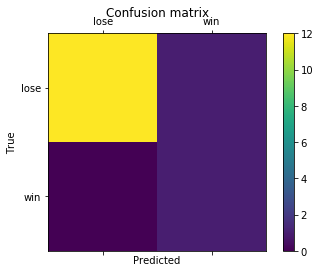

In [16]:
labels = ['lose', 'win']
cm = confusion_matrix(y_deploy, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [17]:
knn = joblib.load('knn_sm.pkl')

In [18]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.86        14
   macro avg       0.46      0.46      0.46        14
weighted avg       0.86      0.86      0.86        14



In [20]:
lgb = joblib.load('lgb_original_data.pkl')

In [25]:
predictions = lgb.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.0995:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [26]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



[[13  0]
 [ 0  1]]


Text(0, 0.5, 'True')

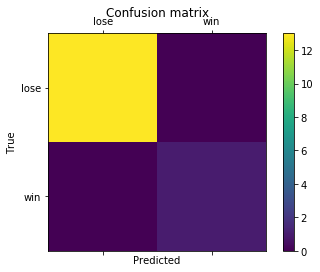

In [27]:
labels = ['lose', 'win']
cm = confusion_matrix(y_deploy, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [28]:
lgb = joblib.load('lgb_rus.pkl')

In [29]:
predictions = lgb.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.55:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [30]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



[[13  0]
 [ 0  1]]


Text(0, 0.5, 'True')

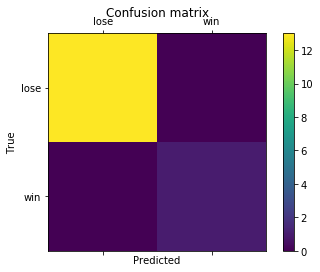

In [31]:
labels = ['lose', 'win']
cm = confusion_matrix(y_deploy, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [32]:
lgb = joblib.load('lgb_sm.pkl')

In [33]:
predictions = lgb.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.5:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [34]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



[[13  0]
 [ 0  1]]


Text(0, 0.5, 'True')

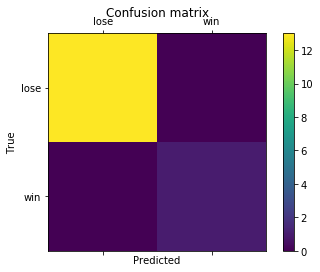

In [35]:
labels = ['lose', 'win']
cm = confusion_matrix(y_deploy, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

<b>Conclusions:</b> <br/>
For KNeighborsClassifier, only model trained with under-sampling data can predict both class 0 and class 1 (with one false positive error). The original data model and over-sampling model can only predict class 0.  <br/>
LightGBM models can predict all data correctly, even using the model trained with skewed dataset (by tuning the threshold value). 